<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,67.958125,96.632910,79.225544,65.652688,-95.071077,224.398189,334.146725,-109.748536
1,0.0,1.0,58.938081,21.527768,66.010336,42.744163,-14.421765,184.798583,193.701226,-8.902643
2,0.0,2.0,88.230276,73.606737,75.055491,84.576242,-94.380799,237.087947,352.462280,-115.374333
3,0.0,3.0,98.815156,98.582623,38.557753,22.739491,-54.359758,214.335266,210.521207,3.814058
4,0.0,4.0,64.557443,70.827853,59.585445,35.874293,-95.156599,145.688435,221.580980,-75.892545
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.768877,92.669159,25.685942,69.594795,96.041754,341.760527,250.275537,91.484991
29996,999.0,26.0,21.383472,58.008873,83.330699,55.804166,-54.802296,173.724914,236.905702,-63.180788
29997,999.0,27.0,35.536504,39.678893,32.474439,27.610892,69.047217,214.347945,135.201410,79.146535
29998,999.0,28.0,70.600730,42.988890,69.723451,60.666613,-77.362154,176.617530,234.738533,-58.121002


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,67.958125,96.632910,79.225544,65.652688,-95.071077,224.398189,334.146725,-109.748536
1,0.0,1.0,58.938081,21.527768,66.010336,42.744163,-14.421765,184.798583,193.701226,-8.902643
2,0.0,2.0,88.230276,73.606737,75.055491,84.576242,-94.380799,237.087947,352.462280,-115.374333
3,0.0,3.0,98.815156,98.582623,38.557753,22.739491,-54.359758,214.335266,210.521207,3.814058
4,0.0,4.0,64.557443,70.827853,59.585445,35.874293,-95.156599,145.688435,221.580980,-75.892545
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.768877,92.669159,25.685942,69.594795,96.041754,341.760527,250.275537,91.484991
29996,999.0,26.0,21.383472,58.008873,83.330699,55.804166,-54.802296,173.724914,236.905702,-63.180788
29997,999.0,27.0,35.536504,39.678893,32.474439,27.610892,69.047217,214.347945,135.201410,79.146535
29998,999.0,28.0,70.600730,42.988890,69.723451,60.666613,-77.362154,176.617530,234.738533,-58.121002


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    67.958125  96.632910  79.225544  65.652688 -95.071077   
      1.0    58.938081  21.527768  66.010336  42.744163 -14.421765   
      2.0    88.230276  73.606737  75.055491  84.576242 -94.380799   
      3.0    98.815156  98.582623  38.557753  22.739491 -54.359758   
      4.0    64.557443  70.827853  59.585445  35.874293 -95.156599   
...                ...        ...        ...        ...        ...   
999.0 25.0   47.768877  92.669159  25.685942  69.594795  96.041754   
      26.0   21.383472  58.008873  83.330699  55.804166 -54.802296   
      27.0   35.536504  39.678893  32.474439  27.610892  69.047217   
      28.0   70.600730  42.988890  69.723451  60.666613 -77.362154   
      29.0   36.148041  61.824900  68.417028  61.975313  43.487713   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    224.398189  334.146725 -109.748536  
      1.0    184.798583  193.701226   -8.902643  
      2.0    237.087947  352.462280 -115.374333  
      3.0    214.335266  210.521207    3.814058  
      4.0    145.688435  221.580980  -75.892545  
...                 ...         ...         ...  
999.0 25.0   341.760527  250.275537   91.484991  
      26.0   173.724914  236.905702  -63.180788  
      27.0   214.347945  135.201410   79.146535  
      28.0   176.617530  234.738533  -58.121002  
      29.0   281.852995  239.926348   41.926647  

[30000 rows x 8 columns]

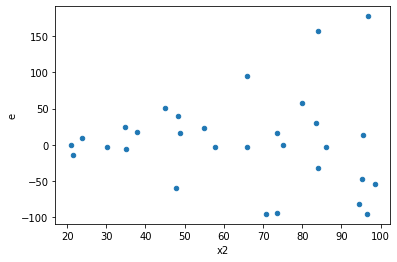

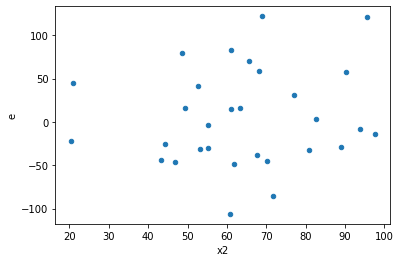

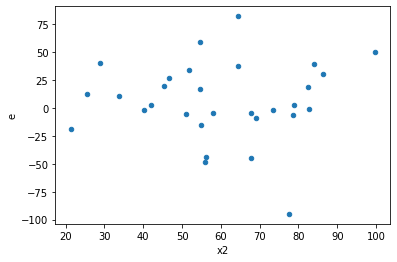

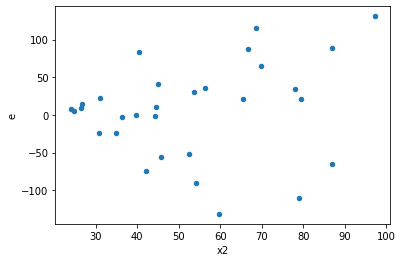

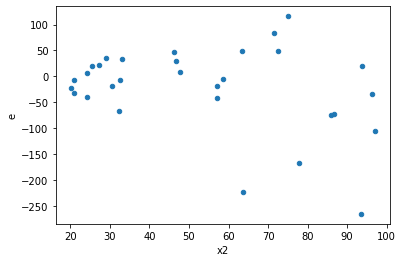

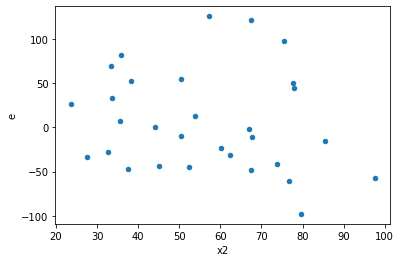

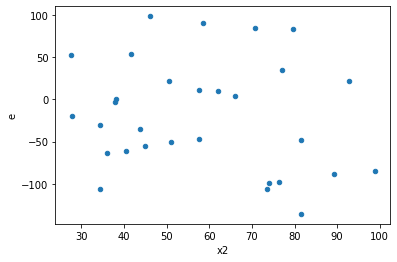

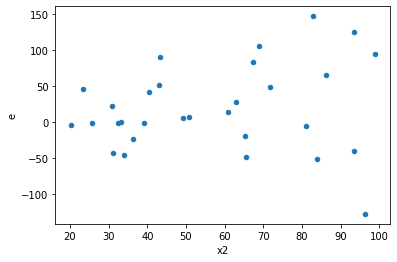

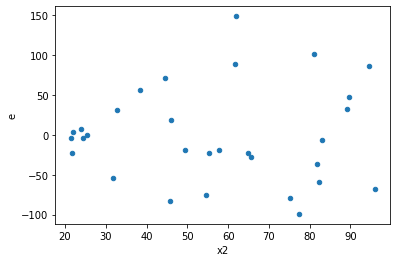

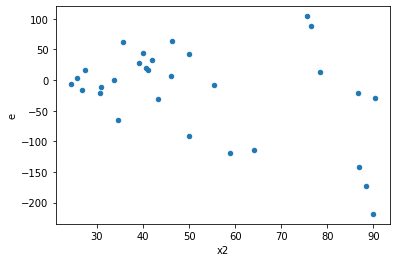

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,17.0,5.0,32415.71712673466,28719.716268050375,1906.8068898079212,5743.943253610075,3.0123361124359485,0.2267429755165904,0.8866285122417048,0.1133714877582952,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,24314.237961721876,67503.73292585822,2701.5819957468752,5192.594840450633,1.9220570941860662,0.27551502299922737,0.8622424885003863,0.13775751149961368,Reject001=1 : Homoscedasticity
10.0,11.0,11.0,42615.11835090628,44515.637306391254,3874.1016682642075,4046.876118762841,1.0445972938485233,0.9436141192510283,0.5281929403744858,0.47180705962551417,Reject001=1 : Homoscedasticity
11.0,8.0,14.0,31485.80194429034,79266.62937563383,3935.7252430362923,5661.902098259559,1.4385918092929613,0.5271370074182935,0.7364314962908532,0.26356850370914675,Reject001=1 : Homoscedasticity
13.0,10.0,12.0,34280.23171958275,59609.662664775846,3428.023171958275,4967.47188873132,1.449077686920543,0.5359115731678699,0.7320442134160651,0.26795578658393493,Reject001=1 : Homoscedasticity
16.0,18.0,4.0,25071.241169396486,8467.216911455916,1392.846731633138,2116.804227863979,1.519768241392926,0.742027278708576,0.628986360645712,0.371013639354288,Reject001=1 : Homoscedasticity
17.0,6.0,16.0,2356.2313696784995,72915.876149344,392.7052282797499,4557.242259334,11.60474048002125,9.304848415547795e-05,0.9999534757579223,4.6524242077738975e-05,Reject001=0 : Heteroscedasticity
18.0,15.0,7.0,39648.274790689815,93463.95591432528,2643.218319379321,13351.99370204647,5.051415391666087,0.037866294847630044,0.981066852576185,0.018933147423815022,Reject001=1 : Homoscedasticity
19.0,17.0,5.0,45702.11501802976,30965.93717764195,2688.359706942927,6193.18743552839,2.303704902113335,0.36277408033163994,0.81861295983418,0.18138704016581997,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,5.0,32415.71712673466,28719.716268050375,1906.8068898079212,5743.943253610075,3.0123361124359485,0.2267429755165904,Reject001=1 : Homoscedasticity
1.0,17.0,5.0,62852.57984154539,5034.5079258502365,3697.210578914435,1006.9015851700473,0.27234088069327417,0.03905823562138431,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,13948.641237345466,9816.30297819445,1268.0582943041334,892.391179835859,0.7037461793706988,0.5699448817855283,Reject001=1 : Homoscedasticity
3.0,20.0,2.0,61734.80843772371,1078.9107246126484,3086.7404218861857,539.4553623063242,0.17476537984256035,0.021675241063486863,Reject001=1 : Homoscedasticity
4.0,14.0,8.0,107143.87162569584,50473.01764354076,7653.133687549703,6309.127205442595,0.8243848158181832,0.7180414823478766,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,52405.8502804292,13329.332831371386,4031.2192523407075,1481.0369812634874,0.3673918208253075,0.099092235467184,Reject001=1 : Homoscedasticity
6.0,14.0,8.0,73173.44559216226,41481.868020470094,5226.674685154447,5185.233502558762,0.992071214473441,0.9441131309778155,Reject001=1 : Homoscedasticity
7.0,9.0,13.0,24314.237961721876,67503.73292585822,2701.5819957468752,5192.594840450633,1.9220570941860662,0.27551502299922737,Reject001=1 : Homoscedasticity
8.0,14.0,8.0,72223.82598161098,18666.411804780506,5158.844712972213,2333.3014755975632,0.4522914732692655,0.18559303002969782,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      876
Reject001=0 : Heteroscedasticity    124
Name: Result_test, dtype: int64